In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gensim

In [4]:
models_dn = '/home/patrick/projects/ShiCo Sprint/'

In [40]:
m1 = model_1950_10y = gensim.models.Word2Vec.load_word2vec_format(models_dn + '1950_1959.w2v',
                                                                  fvocab=models_dn + '1950_1959.vocab.w2v',
                                                                  binary=True)
m2 = model_1951_10y = gensim.models.Word2Vec.load_word2vec_format(models_dn + '1951_1960.w2v',
                                                                  fvocab=models_dn + '1951_1960.vocab.w2v',
                                                                  binary=True)

In [41]:
len(model_1950_10y.vocab), len(model_1951_10y.vocab)

(692536, 749216)

In [42]:
count1 = {key: val.count for key, val in m1.vocab.iteritems()}
count2 = {key: val.count for key, val in m2.vocab.iteritems()}

In [43]:
vocab_count_sorted1 = sorted(count1, key=count1.get, reverse=True)
vocab_count_sorted2 = sorted(count2, key=count2.get, reverse=True)

In [44]:
count_list1 = [count for word, count in count1.iteritems()]
count_list2 = [count for word, count in count2.iteritems()]

In [45]:
np.sum(count_list1), np.sum(count_list2)

(355987241, 390568219)

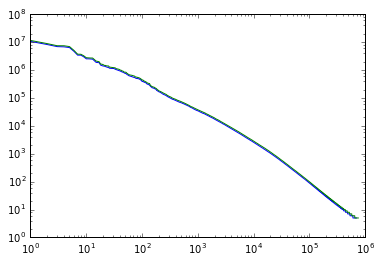

In [47]:
plt.loglog(sorted(count_list1, reverse=True))
plt.loglog(sorted(count_list2, reverse=True))

In [48]:
vocab_combined = list(set(model_1950_10y.vocab.keys()).union(set(model_1951_10y.vocab.keys())))

In [49]:
count_combined = []
for w in vocab_combined:
    try:
        c1 = m1.vocab[w].count
    except KeyError:
        c1 = 0
    try:
        c2 = m2.vocab[w].count
    except KeyError:
        c2 = 0
    count_combined.append(c1 + c2)

In [50]:
vocab_comb_sort = [x for y, x in sorted(zip(count_combined, vocab_combined), reverse=True)]
count_comb_sort = sorted(count_combined, reverse=True)

In [51]:
vocab_comb_sort[:10], count_comb_sort[:10]

([u'de', u'van', u'het', u'en', u'een', u'in', u'te', u'op', u'dat', u'is'],
 [42186155,
  22203733,
  17081110,
  14389867,
  14226050,
  13347968,
  9786355,
  7132927,
  7104682,
  6235311])

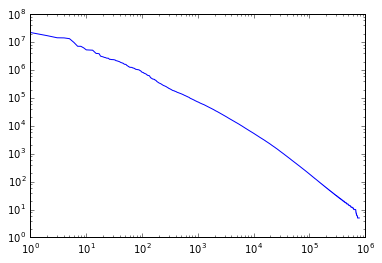

In [53]:
plt.loglog(count_comb_sort)

In [54]:
soestdijk1 = m1.vocab['soestdijk']

In [57]:
soestdijk1.count

3246

In [59]:
cum_count = np.cumsum(count_comb_sort)

In [99]:
np.random.randint(cum_count.max())
ix_rand = np.searchsorted(cum_count, )
w_rand = vocab_comb_sort[ix_rand]
w_rand

u'zich'

In [103]:
p_word_comb_sort = np.array(count_comb_sort) / float(np.sum(count_comb_sort))

In [162]:
N_val_words = 1000

In [163]:
val_words = list(np.random.choice(vocab_comb_sort, size=N_val_words, replace=False, p=p_word_comb_sort))

In [151]:
topN_sim = 50

In [152]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / float(len(set1.union(set2)))

In [157]:
p_word_comb_sort_dict = dict(zip(vocab_comb_sort, p_word_comb_sort))

In [165]:
val_p = []
val_jaccard = []
for val_word in val_words:
    val_p.append(p_word_comb_sort_dict[val_word])

    try:
        sim_words1 = [word for word, _ in m1.most_similar(val_word, topn=topN_sim)]
        sim_words2 = [word for word, _ in m2.most_similar(val_word, topn=topN_sim)]
        val_jaccard.append(jaccard_similarity(set(sim_words1), set(sim_words2)))
    except KeyError:
        val_jaccard.append(0.)

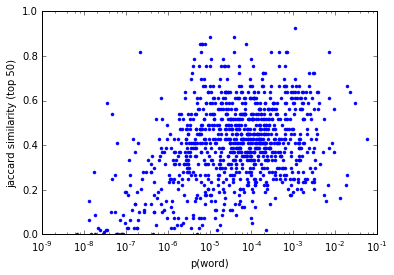

In [171]:
plt.semilogx(val_p, val_jaccard, '.')
plt.xlabel('p(word)')
plt.ylabel('jaccard similarity (top 50)')

In [173]:
import plotly.plotly as ply
import plotly.graph_objs as plgo

In [182]:
trace0 = plgo.Scatter(
  x=val_p,
  y=val_jaccard,
  text=val_words,
  mode="markers"
)
# trace1 = plgo.Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = plgo.Data([trace0,])#, trace1])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')